# Searching for DIBs in Wackerling 1970 catalog

In [56]:
%pylab inline
import os
os.chdir('/pool/TAP/Xinglong216/emission_line_stars/code')

from astropy.table import Table,Column
from astroML.stats import binned_statistic_2d
import astropy.units as u

Populating the interactive namespace from numpy and matplotlib


In [63]:
# W1970 x USNO-B1.0 x 2MASS x SIMBAD
t = Table.read('../data/w1970xUSNOB1x2MASSxSIMBAD.fits')
# B mag valid
ind_photo = np.all([t['Bmag_usnob1']>0., t['Rmag_usnob1']>0.], axis=0)
# R mag between 4.0 and 6.5
ind_bright = np.all([t['Rmag_usnob1']<6.5, t['Rmag_usnob1']>4.], axis=0)
# sky position RA in [60 330] & Dec in [0 90]
ind_observable = np.all([t['_RAJ2000']>0., t['_RAJ2000']<330, t['_DEJ2000']>0.], axis=0)

ind_targeted = np.all([ind_photo, ind_bright, ind_observable], axis=0)

sum(ind_targeted)

80

## calculate observation time

Magnitude | Exposure Time | Overhead | Number of Stars | Total Exposure
-|-|-|-|-
(mag)|(min)|(min)|-|(min)
6.5-6|20|10|22|660
6-5|10|10|22|440
5-4|5|10|14|210
-|-|*Total*|58|1310


In [64]:
# add tobs (exposure time for each targeted star)
t_obs = np.all([t['Rmag_usnob1']>=6.,t['Rmag_usnob1']<7.], axis=0)*20. \
    + np.all([t['Rmag_usnob1']>=5.,t['Rmag_usnob1']<6.], axis=0)*10. \
    + np.all([t['Rmag_usnob1']>=4.,t['Rmag_usnob1']<5.], axis=0)*5.
t.add_column(Column(data=t_obs,name='tobs',unit=u.min))

## Figure : CMD & RA-Dec

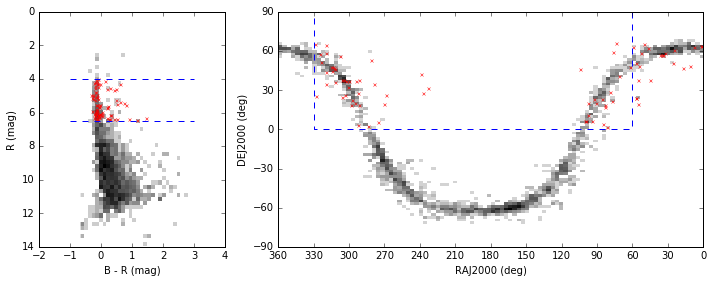

In [65]:
cmap = plt.cm.gray_r
#cmap.set_bad('w', 0.)

fig = figure(figsize=(10,4));
ind_nonnan = np.logical_not(np.any([np.isnan(t['Bmag_usnob1']), np.isnan(t['Rmag_usnob1'])],axis=0))
#-------------------------------------------------------------------
# axes 1
ax1 = fig.add_subplot(131)
N, xedges, yedges = binned_statistic_2d(t['Bmag_usnob1'][ind_nonnan]-t['Rmag_usnob1'][ind_nonnan], 
                                        t['Rmag_usnob1'][ind_nonnan], 
                                        t['Rmag_usnob1'][ind_nonnan], 
                                        'count', bins=[100,80])
plt.imshow(np.log10(N.T), origin='lower',
           extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]],
           aspect='auto', interpolation='nearest', cmap=cmap)

ax1.plot(t['Bmag_usnob1'][ind_targeted]-t['Rmag_usnob1'][ind_targeted], t['Rmag_usnob1'][ind_targeted], 'rx', ms=3)
ax1.set_xlim(-2., 4.)
ax1.set_ylim(14., 0.)
ax1.set_xlabel('B - R (mag)')
ax1.set_ylabel('R (mag)')

ax1.plot([-1., 3.], [ 4., 4.], 'b--')
ax1.plot([-1., 3.], [ 6.5, 6.5], 'b--')

#-------------------------------------------------------------------
# axes 2
ax2 = fig.add_subplot(1,3,(2,3))
N, xedges, yedges = binned_statistic_2d(t['_RAJ2000'], 
                                        t['_DEJ2000'], 
                                        t['_DEJ2000'], 
                                        'count', bins=[100,80])
#ax2.plot(t['_RAJ2000'], t['_DEJ2000'], 'k.', ms=1.5)
ax2.imshow(np.log10(N.T), origin='lower',
           extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]],
           aspect='auto', interpolation='nearest', cmap=cmap)

ax2.plot(t['_RAJ2000'][ind_targeted], t['_DEJ2000'][ind_targeted], 'rx', ms=3)
ax2.set_xlim(360., 0.)
ax2.set_ylim(-90., 90.)
ax2.set_xticks(np.arange(0., 390., 30.))
ax2.set_yticks(np.arange(-90., 120., 30.))
ax2.set_xlabel('RAJ2000 (deg)')
ax2.set_ylabel('DEJ2000 (deg)')


ax2.plot([60., 60., 330., 330.],
         [90.,  0.,   0.,  90.],
         'b--')
#-------------------------------------------------------------------
# save figure
fig.tight_layout()
fig.savefig('../figs/w1970.cmd.eps')
fig.savefig('../figs/w1970.cmd.pdf')

In [59]:
t.colnames

['_RAJ2000',
 '_DEJ2000',
 'Seq',
 'Name',
 'u_Name',
 'ID_Codes',
 'HD',
 'm_HD',
 'DM',
 'm_DM',
 'MWC',
 'u_MWC',
 'HPC',
 'u_HPC',
 'Ton',
 'LS',
 'm_LS',
 'Wray',
 'u_Wray',
 'Henize',
 'u_Henize',
 'RAB1950',
 'DEB1950',
 'PrecDec',
 'GLON',
 'GLAT',
 'SpType',
 'Vmag',
 'n_Vmag',
 'Bmag',
 'n_Bmag',
 '_RA_icrs',
 '_DE_icrs',
 'observable',
 'GAL_LONG',
 'GAL_LAT',
 'USNO-B1.0',
 'RAJ2000_usnob1',
 'DEJ2000_usnob1',
 'errHalfMaj_usnob1',
 'errHalfMin_usnob1',
 'errPosAng_usnob1',
 'Bmag1',
 'Rmag1',
 'Bmag2',
 'Rmag2',
 'Imag',
 'Bmag_usnob1',
 'Rmag_usnob1',
 'Epoch',
 'pmRA_usnob1',
 'pmDE_usnob1',
 'e_pmRA',
 'e_pmDE',
 'Flags',
 'B1s/g',
 'R1s/g',
 'B2s/g',
 'R2s/g',
 'Is/g',
 'angDist_usnob1',
 '2MASS',
 'RAJ2000_2mass',
 'DEJ2000_2mass',
 'errHalfMaj_2mass',
 'errHalfMin_2mass',
 'errPosAng_2mass',
 'Jmag',
 'Hmag',
 'Kmag',
 'e_Jmag',
 'e_Hmag',
 'e_Kmag',
 'Qfl',
 'Rfl',
 'X',
 'MeasureJD',
 'angDist_2mass',
 'main_id',
 'ra',
 'dec',
 'errHalfMaj_simbad',
 'errHalfMin_si

In [49]:
# Exposure time
num =  np.array([np.sum(np.all([t['Rmag_usnob1']>=7.,t['Rmag_usnob1']<8.,ind_targeted], axis=0)),
                 np.sum(np.all([t['Rmag_usnob1']>=6.,t['Rmag_usnob1']<7.,ind_targeted], axis=0)),
                 np.sum(np.all([t['Rmag_usnob1']>=5.,t['Rmag_usnob1']<6.,ind_targeted], axis=0)),
                 np.sum(np.all([t['Rmag_usnob1']>=4.,t['Rmag_usnob1']<5.,ind_targeted], axis=0)),
                 np.sum(np.all([t['Rmag_usnob1']>=3.,t['Rmag_usnob1']<4.,ind_targeted], axis=0)),
                 np.sum(np.all([t['Rmag_usnob1']>=2.,t['Rmag_usnob1']<3.,ind_targeted], axis=0)),
                 np.sum(np.all([t['Rmag_usnob1']>=1.,t['Rmag_usnob1']<2.,ind_targeted], axis=0))])
print 'The numbers of stars in each Rmag bin:---------------------------'
print num
print 'Total exposure time (min):---------------------------------------'
print num*(np.array([40., 20., 10., 5., 2., 1., 0.5])+10.)
print np.sum(num*(np.array([40., 20., 10., 5., 2., 1., 0.5])+10.))
print 'Total exposure time (day):---------------------------------------'
print np.sum(num*(np.array([40., 20., 10., 5., 2., 1., 0.5])+10.))/60/8

The numbers of stars in each Rmag bin:---------------------------
[ 0 22 22 14  0  0  0]
Total exposure time (min):---------------------------------------
[   0.  660.  440.  210.    0.    0.    0.]
1310.0
Total exposure time (day):---------------------------------------
2.72916666667


In [67]:
# full version of targeted 58 stars
tt = t[ind_targeted]
tt.sort('RAJ2000_2mass')
tt.add_column(Column(np.arange(1,np.sum(ind_targeted)+1,1),name='id'),0)
tt.write('../data/w1970.targeted.fits',overwrite=True)
tt.write('../data/w1970.targeted.csv')
tt.write('../data/w1970.targeted.tex',format='latex')

# simple version
tt = t['MWC','Name','otype',\
       'RAJ2000_2mass','DEJ2000_2mass',\
       'RAB1950','DEB1950',\
       'Bmag_usnob1','Rmag_usnob1', 'tobs'][ind_targeted]
tt.sort('RAJ2000_2mass')
tt.add_column(Column(np.arange(1,np.sum(ind_targeted)+1,1),name='id'),0)
tt.write('../data/w1970.targeted.simple.fits',overwrite=True)
tt.write('../data/w1970.targeted.simple.csv')
tt.write('../data/w1970.targeted.simple.tex',format='latex')


In [68]:
tt
# tt.colnames

id,MWC,Name,otype,RAJ2000_2mass,DEJ2000_2mass,RAB1950,DEB1950,Bmag_usnob1,Rmag_usnob1,tobs
,,,,deg,deg,"""h:m:s""","""d:m:s""",mag,mag,min
int64,str5,str9,str19,float64,float64,str8,str8,float32,float32,float64
1,408,HR 9097,BlueSG**,0.857155,63.640488,00 00 51,+63 21.8,6.47,6.13,20.0
2,2,10 CAS,Be*,1.610423,64.196182,00 03 50,+63 55.1,5.52,5.57,10.0
3,7,KAP CAS,BlueSG**,8.250018,62.931725,00 30 08,+62 39.4,4.24,4.12,5.0
4,8,OMI CAS,Be*,11.181301,48.284374,00 41 56,+48 00.7,4.395,4.495,5.0
5,420,PHI AND,Star,17.375591,47.241756,01 06 35,+46 58.5,4.2,4.32,5.0
6,,,Em*,24.779774,61.079102,01 35 44,+60 49.5,7.59,6.425,20.0
7,16,PHI PER,Be*,25.915193,50.688694,01 40 31,+50 26.3,3.89,4.065,5.0
8,436,HR 618,RSG*,32.169295,58.423538,02 05 10,+58 11.2,6.135,5.405,10.0
